In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install jieba

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/zhufang147/dstools/data/my_data.csv")

In [ ]:
df.head()

,Unnamed: 0,评分,评论
0,0,4.0,"I'm one of the very, very few people who canno..."
1,1,5.0,"Connected these to my fire stick, which is why..."
2,2,5.0,I was thoroughly impressed with the Tozo T10. ...
3,3,5.0,Every Christmas I usually have enough personal...
4,4,5.0,I absolutely love these earbuds! I was lookin...


In [ ]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [ ]:
df.head()

,评分,评论
0,4.0,"I'm one of the very, very few people who canno..."
1,5.0,"Connected these to my fire stick, which is why..."
2,5.0,I was thoroughly impressed with the Tozo T10. ...
3,5.0,Every Christmas I usually have enough personal...
4,5.0,I absolutely love these earbuds! I was lookin...


In [ ]:
# 去掉缺失值
df.dropna(axis = 0, inplace = True)

In [ ]:
# 更改列名
df.rename(columns={'评分': 'rate', '评论': 'comments'}, inplace=True)

In [ ]:
# 将rate改成int型
df['rate'] = df['rate'].astype(int)

In [ ]:
# 重新排列索引
df = df.reset_index()

In [ ]:
df

,index,rate,comments
0,0,4,"I'm one of the very, very few people who canno..."
1,1,5,"Connected these to my fire stick, which is why..."
2,2,5,I was thoroughly impressed with the Tozo T10. ...
3,3,5,Every Christmas I usually have enough personal...
4,4,5,I absolutely love these earbuds! I was lookin...
...,...,...,...
4995,5502,5,Pros: These headphones are an AMAZING deal. $5...
4996,5503,1,"\n These worked well for a few months, the so..."
4997,5504,4,"\n they sound great, and do indeed work in th..."
4998,5505,5,These are fantastic headphones. I tried the T...


In [ ]:
df.drop('index', axis = 1, inplace = True)

In [ ]:
df.groupby(df['rate']).count()

,comments
rate,
1,551
2,491
3,562
4,888
5,2508


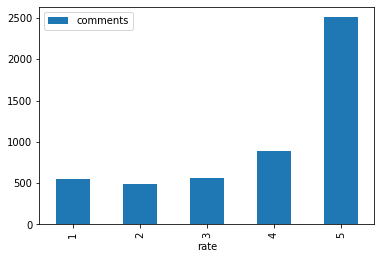

In [ ]:
# 展示评论打分的分布
df.groupby(df['rate']).count().plot.bar()
# plt.xlabel('Rate')
# plt.ylabel('Count')
plt.savefig('comment_bar.jpg')

In [ ]:
from string import punctuation
import re
from nltk.corpus import stopwords
import matplotlib

import nltk
nltk.download('stopwords')

# 读取nltk的停用词
sw_nltk = stopwords.words("english")

# 对字符串进行预处理
def pipline_process(content):
    # 去掉标点符号
    processed_string = ''    
    for word in content:
        word = re.sub(r'[{}]+'.format(punctuation),' ',word)
        processed_string += word
    
    # 将字符改为小写
    processed_string = processed_string.lower()

    # 去掉停用词
    words = [word for word in processed_string.split() if word.lower() not in sw_nltk]
    processed_string = " ".join(words)

    return processed_string

# 对df的评论进行预处理
def df_process(df):
    for idx in range(len(df)):
        df.loc[idx, 'comments'] = pipline_process(df.loc[idx, 'comments'])
    return df

# 合并文本
def merge_comment(df):
    result_string = ""
    for idx in range(len(df)):
        temp_str = df.loc[idx, 'comments']
        result_string += temp_str
    return result_string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = df_process(df)

## 差评分析

In [ ]:
# 过滤出差评评论 rate = 1, rate = 2
df_bad_comment = df[df['rate'] < 3]
df_bad_comment = df_bad_comment.reset_index()
df_bad_comment.drop('index', axis = 1)

,rate,comments
0,1,bought pair earlier year gave 1 star review ma...
1,1,edit stay connected headphones felt expensive ...
2,1,despite false claim amazon q board earbuds tou...
3,1,ear phones keep cutting
4,2,good around office kitchen smaller ears fit fi...
...,...,...
1037,2,nearly month half started great lasted pros fi...
1038,2,earbuds quite difficult use pairing sequence h...
1039,1,like everybody else saying earbuds wouldn’t co...
1040,1,update amend previous review right earbud went...


In [ ]:
# 合并差评文本
bad_comment_string = merge_comment(df_bad_comment)

bad_comment_list = bad_comment_string.split()

In [ ]:
# 进行词频统计
freq_dic = {}
for word in bad_comment_list:
    freq_dic[word] = freq_dic.get(word, 0) + 1

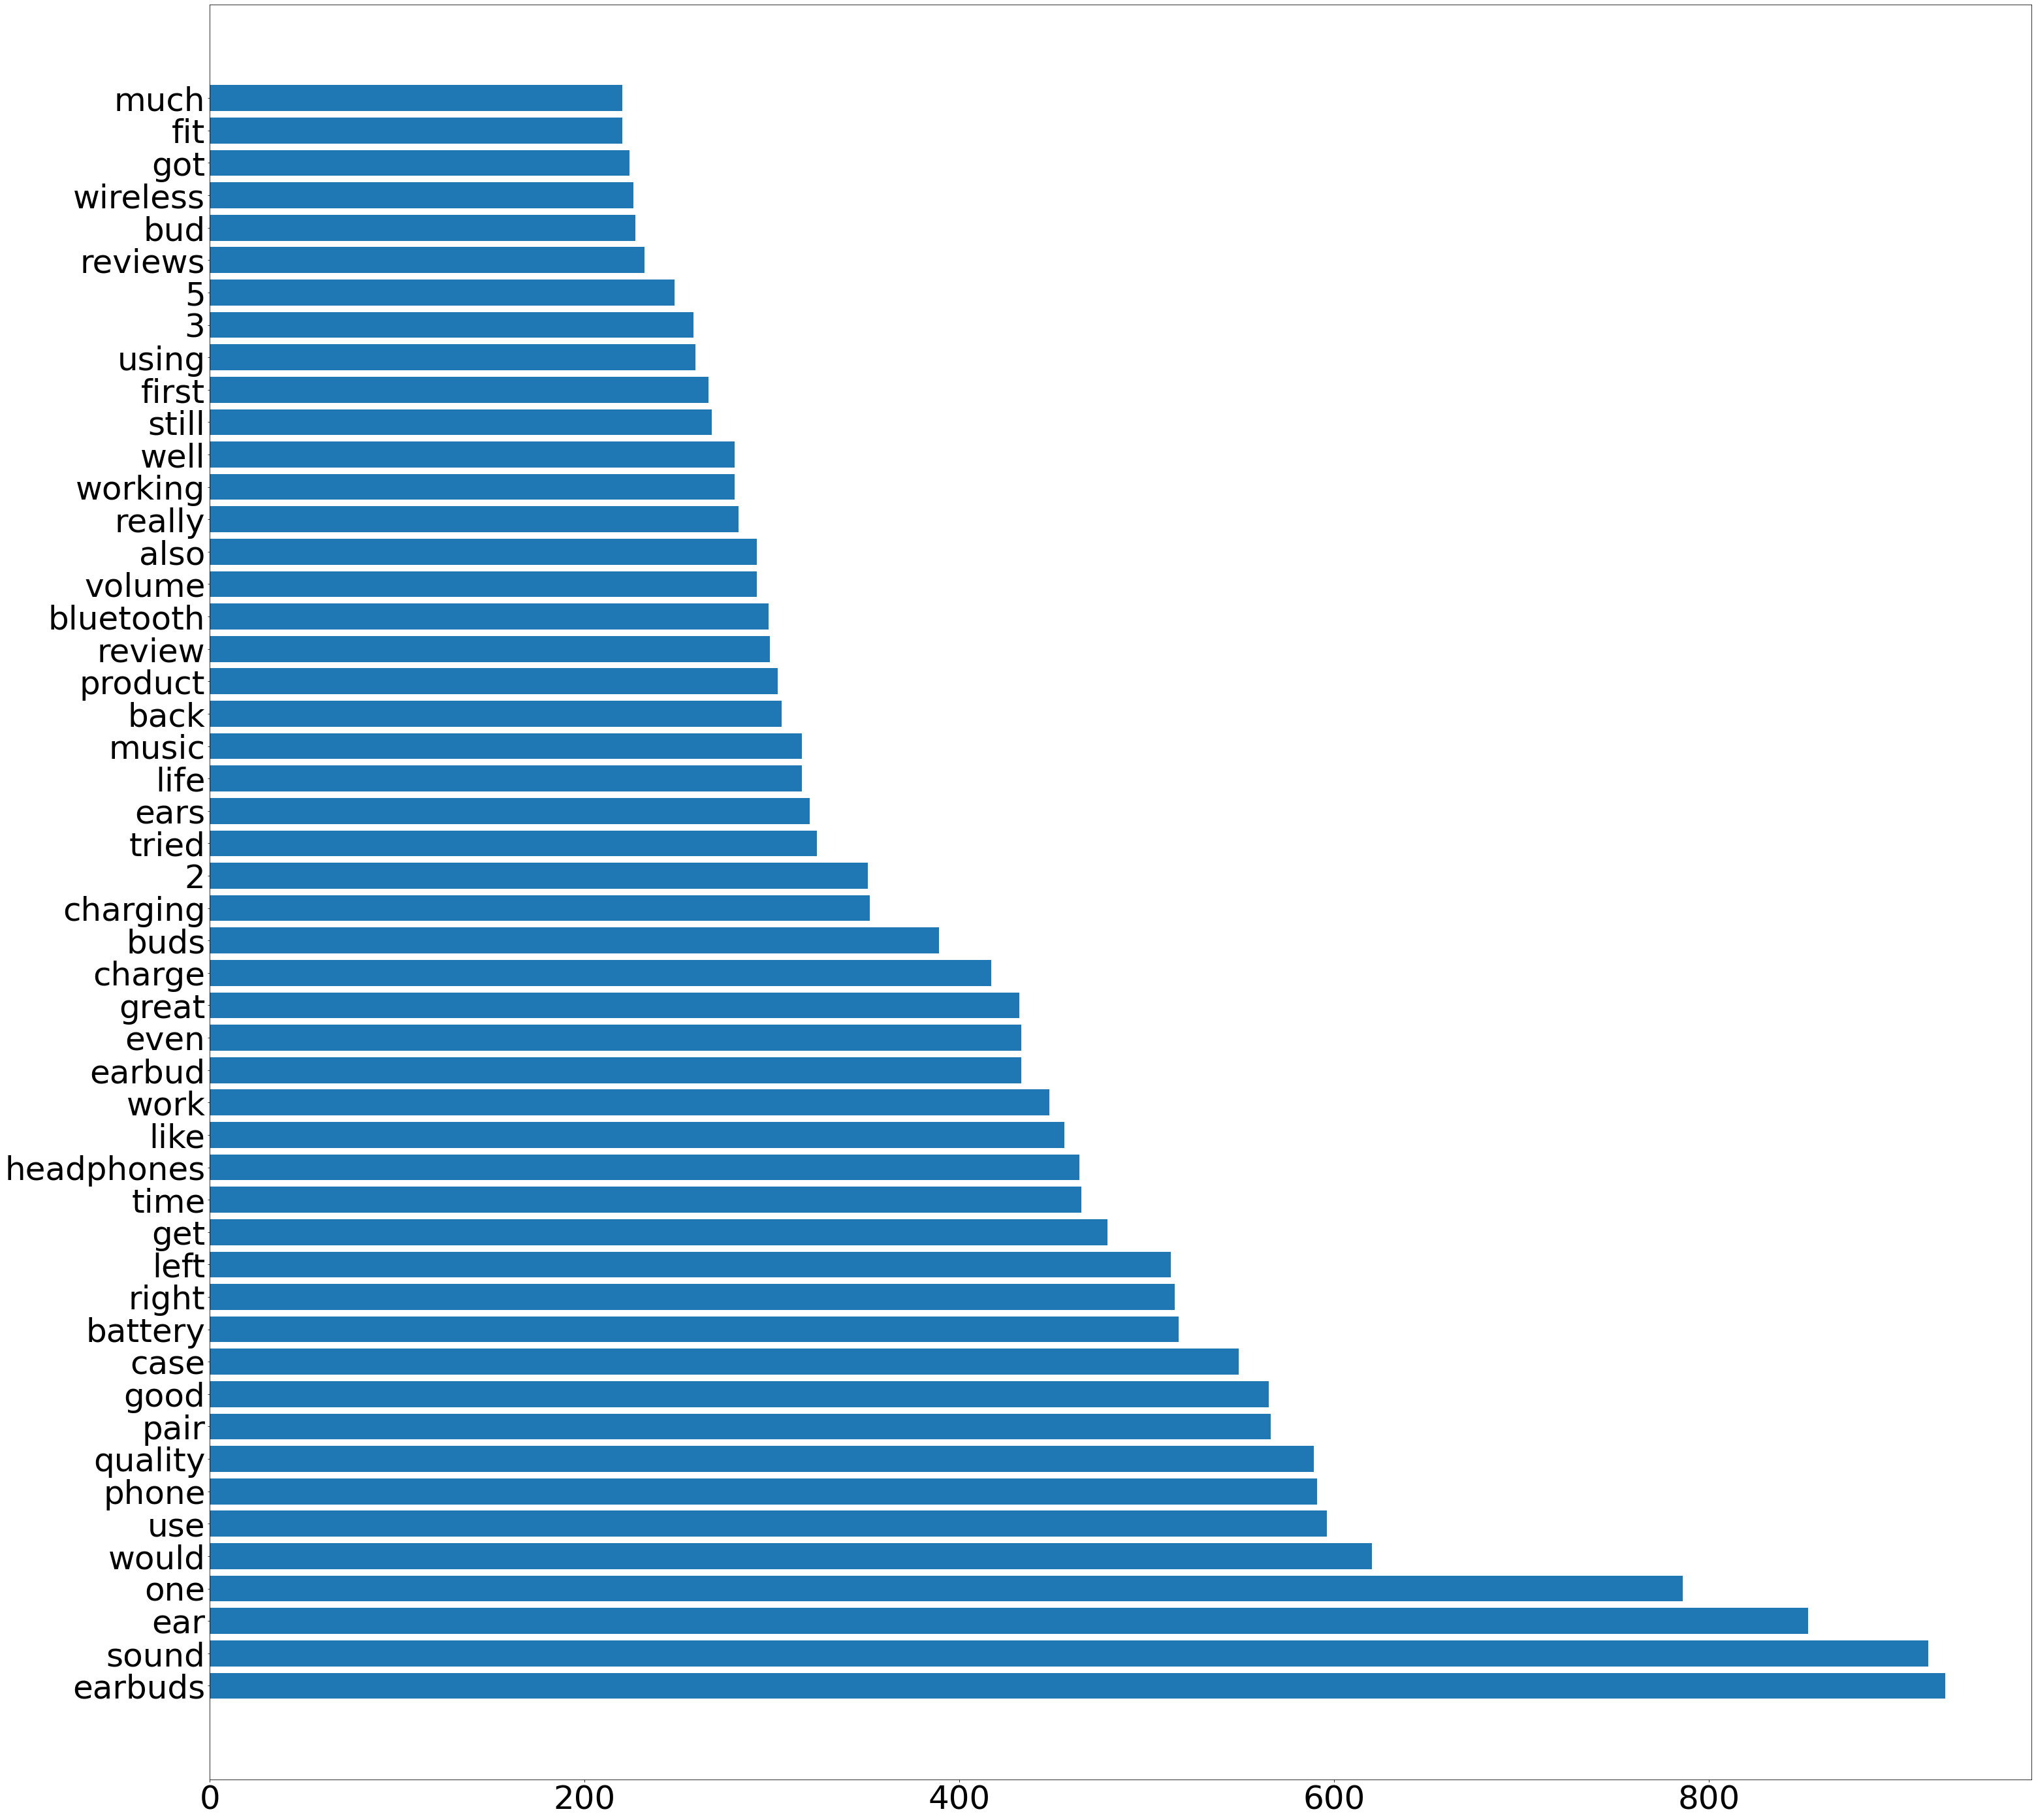

In [ ]:
def draw_from_dict(dicdata,RANGE, heng=0):
    #dicdata：字典的数据。
    #RANGE：截取显示的字典的长度。
    #heng=0，代表条状图的柱子是竖直向上的。heng=1，代表柱子是横向的。考虑到文字是从左到右的，让柱子横向排列更容易观察坐标轴。
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    plt.figure(figsize=(50,50))
    matplotlib.rc('xtick', labelsize=50) 
    matplotlib.rc('ytick', labelsize=50)
    x = []
    y = []
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    if heng == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        plt.savefig('bad_comment_freq.jpg')
        plt.show()
        return 
    elif heng == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        plt.savefig('bad_comment_freq.jpg')
        plt.show()
        return 
    else:
        return "heng的值仅为0或1！"

draw_from_dict(freq_dic, 50, 1)

# 改进措施
# 提高音量调节灵敏度：volume, sound
# 提高佩戴舒适性：ear
# 提高电池质量: charge, battery
# 提高蓝牙稳定性: bluetooth, wireless

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.103 seconds.
Prefix dict has been built successfully.


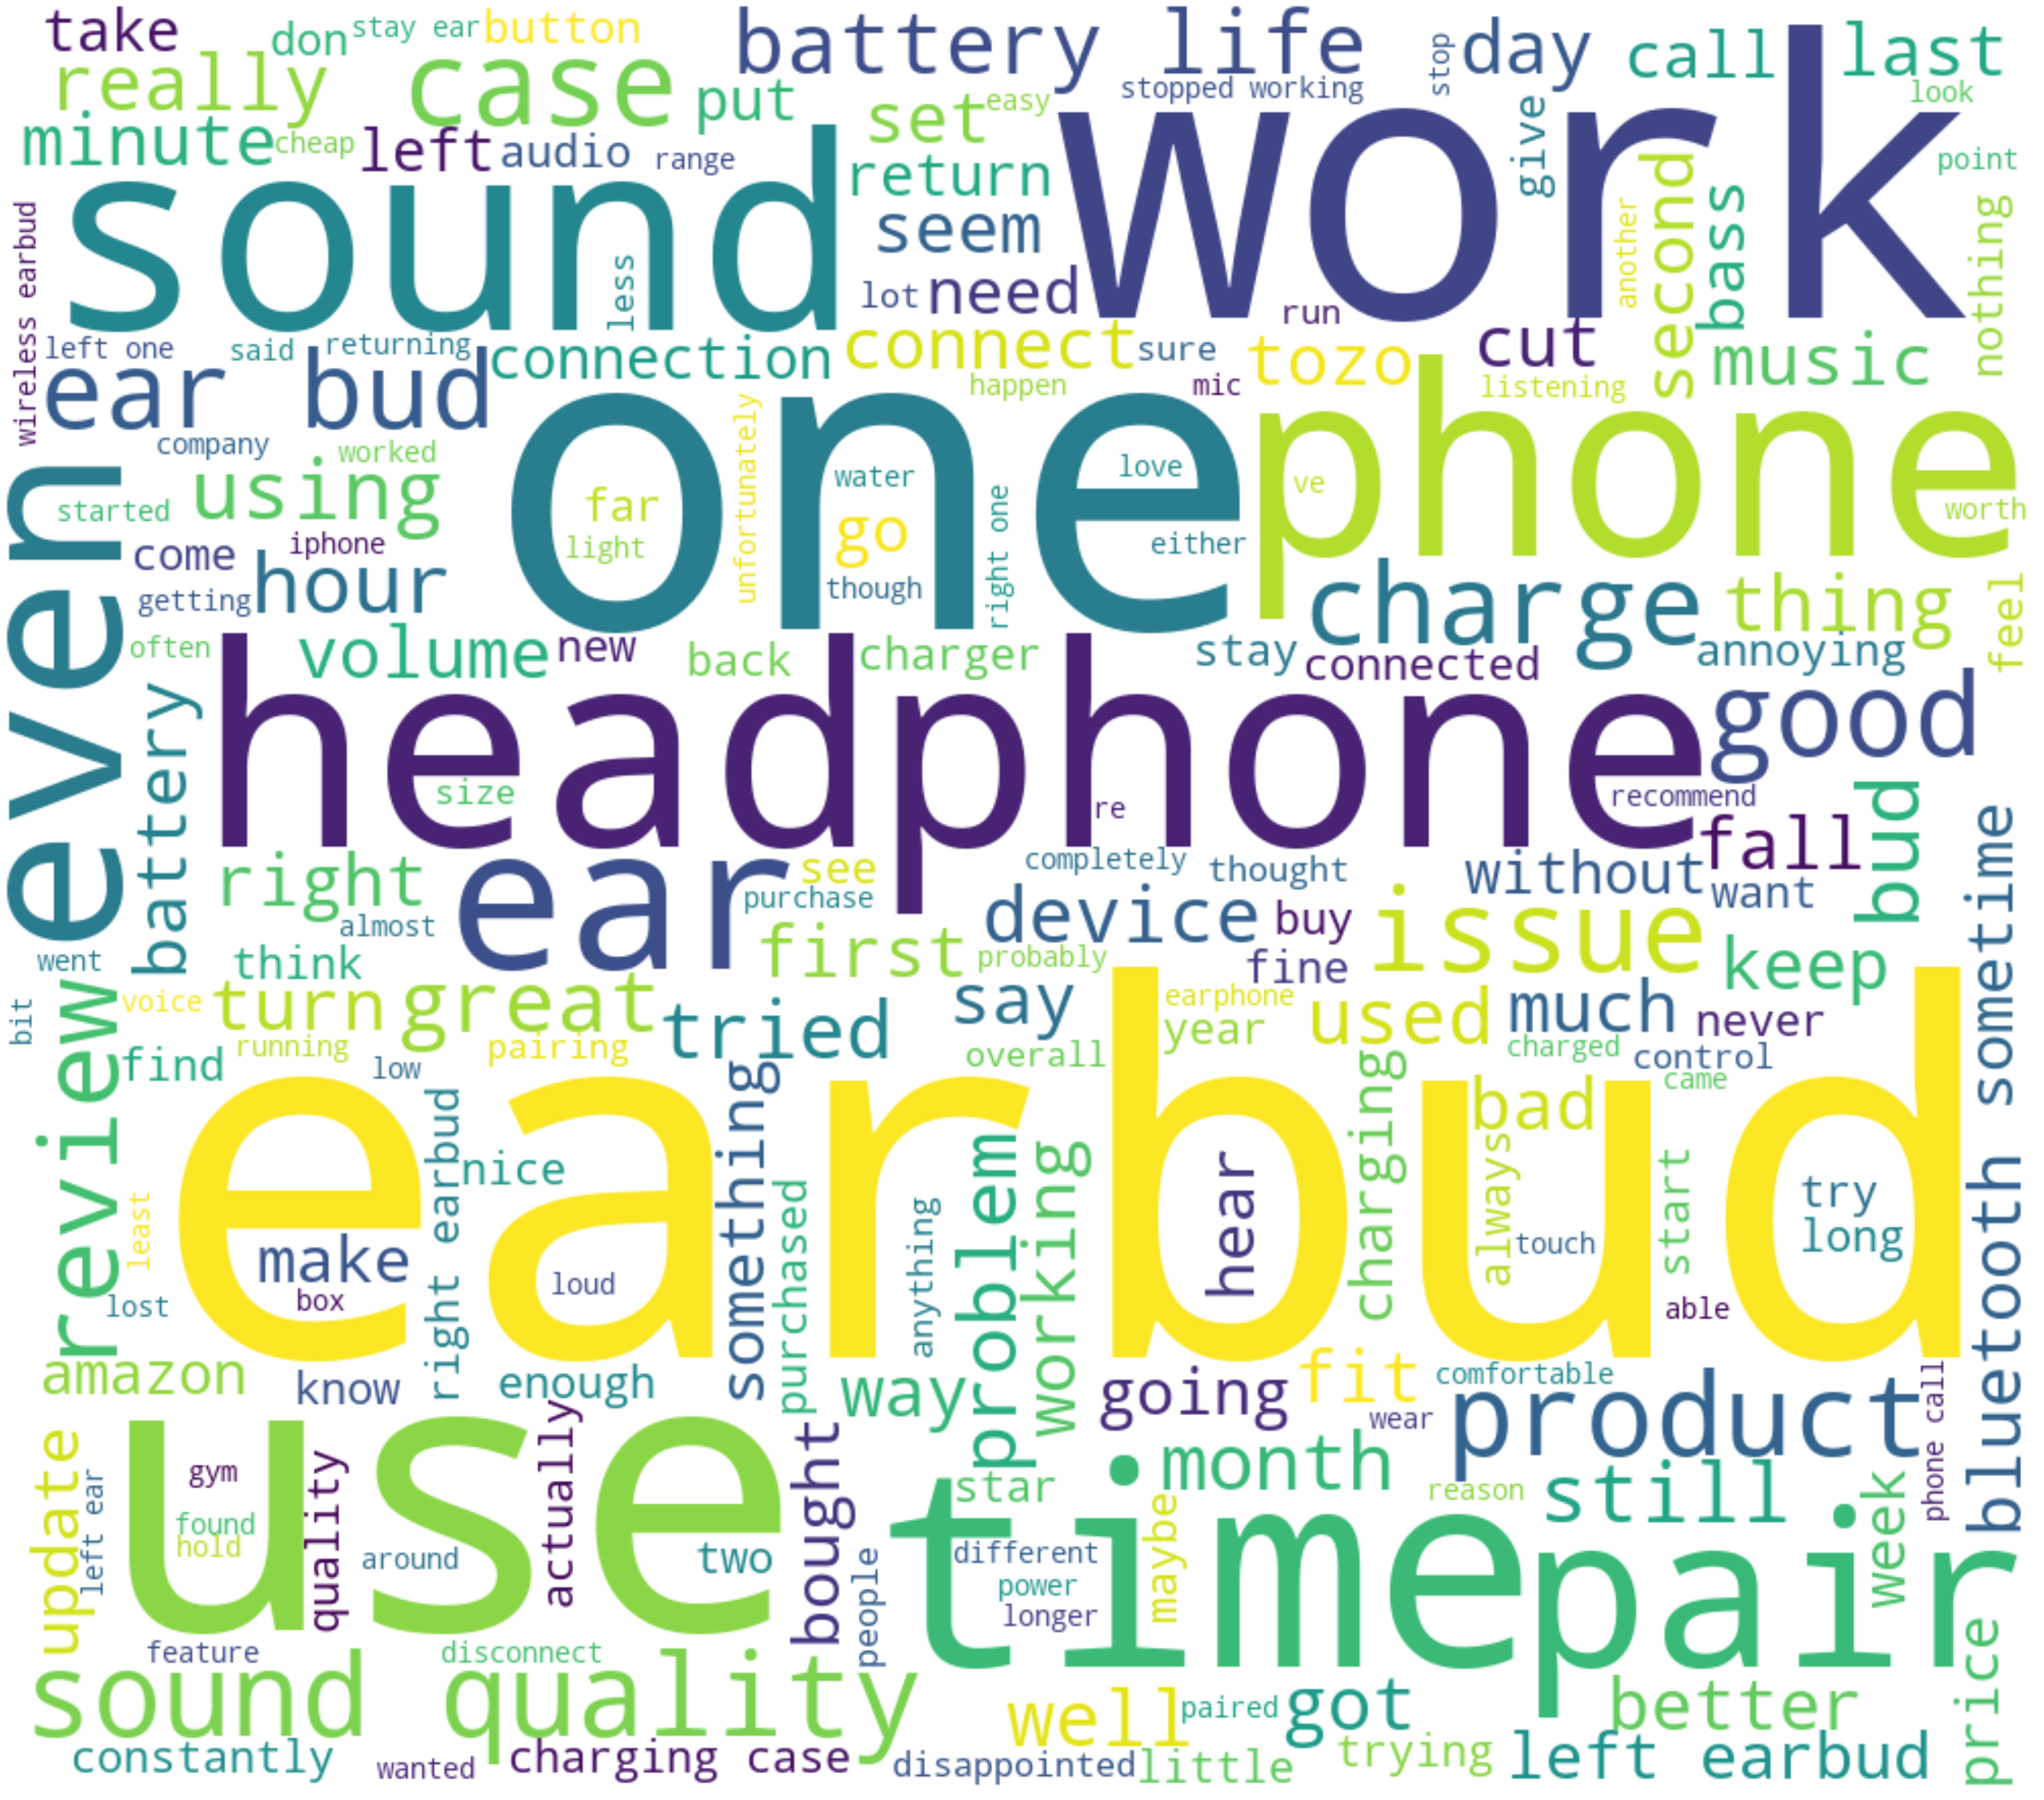

In [ ]:
# 生成词云
from wordcloud import WordCloud # 词云库
import jieba

wordcloud = WordCloud(background_color='white',width=1000,height=880)
bad_comment_result = jieba.lcut(bad_comment_string)
space_list = ' '.join(bad_comment_result)
wordcloud.generate(space_list)
wordcloud.to_file(r"wordcloud.png")
plt.figure('wordcloud',figsize=(50,50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2. SVM 分类

In [ ]:
# 划分为好评差评
df["good or bad"] = df["rate"]
df.loc[df["good or bad"] <3, 'good or bad'] = 0
df.loc[df["good or bad"] >= 3, 'good or bad'] = 1

In [ ]:
# 划分数据集
train_data = df.sample(frac = 0.8, random_state=123, axis = 0)
test_data = df[~df.index.isin(train_data.index)]

# 向量化
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(train_data['comments'])
test_vectors = vectorizer.transform(test_data['comments'])

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

# 引入超参数调整
parameters_svm = {'kernel':('linear', 'rbf'), 'gamma': [10**k for k in range(-5, -1)], 'C':[10**k for k in range(-2, 2)]}

# 定义分类器
svc = svm.SVC()
clf = GridSearchCV(svc, parameters_svm)
clf.fit(train_vectors, train_data['good or bad'])

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01],
                         'kernel': ('linear', 'rbf')})

In [ ]:
# 保存模型
import joblib
joblib.dump(clf, 'svm.pkl')
clf = joblib.load('svm.pkl')

In [ ]:
prediction_linear = clf.predict(test_vectors)
report = classification_report(test_data['good or bad'], prediction_linear)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.45      0.54       210
           1       0.87      0.94      0.90       790

    accuracy                           0.84      1000
   macro avg       0.77      0.70      0.72      1000
weighted avg       0.83      0.84      0.83      1000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parameters_knn = {'n_neighbors':[1+k for k in range(10)]}

In [ ]:
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters_knn)
clf.fit(train_vectors, train_data['good or bad'])

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
# 保存模型
import joblib
joblib.dump(clf, 'knn.pkl')
clf = joblib.load('knn.pkl')

In [ ]:
prediction_knn = clf.predict(test_vectors)
report = classification_report(test_data['good or bad'], prediction_knn)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.30      0.40       210
           1       0.84      0.95      0.89       790

    accuracy                           0.81      1000
   macro avg       0.72      0.62      0.64      1000
weighted avg       0.79      0.81      0.79      1000

